In [25]:
import sys
import json
import re
import string
import nltk
import uuid
import glob
import numpy as np
from numpy import mean, ptp, var, std, median
from scipy.stats import mode
import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.pyplot 
from matplotlib import pyplot
%matplotlib inline

In [203]:
def drawBar_category(grades):
    xticks = ['L M', 'T M', 'O M', 'C B',
              'COOP',"C O P","No"]
    color = ["red","blue","yellow","green","magenta","orange","grey"]
    gradeGroup = {}
    
    for grade in grades:
        gradeGroup[grade] = gradeGroup.get(grade, 0) + 1

    fig = pyplot.bar(range(7), [gradeGroup.get(xtick, 0) for xtick in xticks], align='center',
               color = color, width = 0.5,animated=True)

    pyplot.xticks(range(7), xticks)
    pyplot.xlabel('Category')
    pyplot.ylabel('Frequency')
    pyplot.title('Category Of CyberSecurity')
#     pyplot.figure(figsize=(40,40)) 
    pyplot.show()

In [204]:
def drawBar_subcategory(grades):
    xticks = ['LM_CL','LM_RC','TM_CIRT','TM_STAN','TM_CER','OM_P','OM_ROAD',"OM_RA",'OM_NB',
              'CB_SD','CB_MD','CB_PC','CB_AC','COOP_IS','COOP_IA','COOP_PS','COOP_IC',
              "COP_NL","COP_UN","COP_IS","COP_RM","No"]
    color = ["red","crimson","cyan","deepskyblue","dodgerblue",
             "khaki","yellow","yellow","gold",
             "greenyellow","chartreuse","lawngreen","lime",
             "magenta","fuchsia","m","darkmagenta",
             "orange","darkorange","sandybrown","orangered",
             "grey"]
    gradeGroup = {}
    
    for grade in grades:
        gradeGroup[grade] = gradeGroup.get(grade, 0) + 1

    fig = pyplot.bar(range(22), [gradeGroup.get(xtick, 0) for xtick in xticks], align='center',
               color = color, width = 0.6,animated=True)

    pyplot.xticks(range(22), xticks)
    pyplot.xlabel('Subcategory')
    pyplot.ylabel('Frequency')
    pyplot.title('Subcategory Of CyberSecurity')
#     pyplot.figure(figsize=(40,40)) 
    pyplot.show()

In [205]:
def drawPie_category(grades):
    labels = ['L M', 'T M', 'O M', 'C B',
              'COOP',"C O P","No"]
    color = ["red","blue","yellow","green","magenta","orange","grey"]
    gradeGroup = {}
    for grade in grades:
        gradeGroup[grade] = gradeGroup.get(grade, 0) + 1
    #创建饼形图
    #第一个参数为扇形的面积
    #labels参数为扇形的说明文字
    #autopct参数为扇形占比的显示格式
    pyplot.pie([gradeGroup.get(label, 0) for label in labels], labels=labels, autopct='%1.2f%%',colors=color
             ,radius = 1.1)
    pyplot.title('Category Of CyberSecurity')
    pyplot.show()

In [206]:
def drawPie_subcategory(grades):
    labels = ['LM_CL','LM_RC','TM_CIRT','TM_STAN','TM_CER','OM_P','OM_ROAD',"OM_RA",'OM_NB',
              'CB_SD','CB_MD','CB_PC','CB_AC','COOP_IS','COOP_IA','COOP_PS','COOP_IC',
              "COP_NL","COP_UN","COP_IS","COP_RM","No"]
    color = ["red","crimson","cyan","deepskyblue","dodgerblue",
             "khaki","yellow","yellow","gold",
             "greenyellow","chartreuse","lawngreen","lime",
             "magenta","fuchsia","m","darkmagenta",
             "orange","darkorange","sandybrown","orangered",
             "grey"]
    gradeGroup = {}
    for grade in grades:
        gradeGroup[grade] = gradeGroup.get(grade, 0) + 1
    #创建饼形图
    #第一个参数为扇形的面积
    #labels参数为扇形的说明文字
    #autopct参数为扇形占比的显示格式
    pyplot.pie([gradeGroup.get(label, 0) for label in labels], labels=labels, autopct='%1.2f%%',colors=color
             ,radius = 1.5)
    pyplot.title('Subcategory Of CyberSecurity')
    pyplot.show()

In [207]:
def category_collect(content):
    category_list = []
    for i in range(len(content)):
        if len(content[i]["tag"][0]["category"])> 0:
            for j in content[i]["tag"][0]["category"]:
                if j == "legal measures":
                    category_list.append("L M")
                elif j == "technical measures":
                    category_list.append("T M")
                elif j == "organization measures":
                    category_list.append("O M")
                elif j == "capacity building":
                    category_list.append("C B")
                elif j == "cooperation":
                    category_list.append("COOP")
                else:
                    category_list.append("C O P")
        else:
            category_list.append("No")
    return category_list

In [208]:
def subcategory_colloct(content):
    subcategory_list = []
    for i in range(len(content)):
        if len(content[i]["tag"][0]["subcategory"])> 0:
            for j in content[i]["tag"][0]["subcategory"]:
                if j == "criminal legislation":
                    subcategory_list.append("LM_CL")
                elif j == "regulation and compliance":
                    subcategory_list.append("LM_RC")
                elif j == "cirt":
                    subcategory_list.append("TM_CIRT")
                elif j == "standards":
                    subcategory_list.append("TM_STAN")
                elif j == "certification":
                    subcategory_list.append("TM_CER")
                elif j == "policy":
                    subcategory_list.append("OM_P")
                elif j == "roadmap for governance":
                    subcategory_list.append("OM_ROAD")
                elif j == "responsible agency":
                    subcategory_list.append("OM_RA")
                elif j == "national benchmarking":
                    subcategory_list.append("OM_NB")
                elif j == "standardisation development":
                    subcategory_list.append("CB_SD")
                elif j == "manpower development":
                    subcategory_list.append("CB_MD")
                elif j == "professional certification":
                    subcategory_list.append("CB_PC")
                elif j == "agency certification":
                    subcategory_list.append("CB_AC")
                elif j == "intra-state cooperation":
                    subcategory_list.append("COOP_IS")
                elif j == "intra-agency cooperation":
                    subcategory_list.append("COOP_IA")
                elif j == "public sector partnership":
                    subcategory_list.append("COOP_PS")
                elif j == "international cooperation":
                    subcategory_list.append("COOP_IC")
                elif j == "national legislation":
                    subcategory_list.append("COP_NL")
                elif j == "un convention and protocol":
                    subcategory_list.append("COP_UN")
                elif j == "institutional support":
                    subcategory_list.append("COP_IS")
                elif j == "reporting mechanism":
                    subcategory_list.append("COP_RM")
        else:
            subcategory_list.append("No")
    return subcategory_list

In [244]:
def input_countryname():
    country_name = raw_input("please input the country name:")
    return country_name

In [282]:
def show_content(content,countryname):
    for sentence in content:
            print "Sentence: "+sentence["sentence"]
            print "Country:" + countryname
            category_list = []
            for category in sentence["tag"][0]["category"]:
                category_list.append(category)
            print "Category: " + str(category_list)
            subcategory_list = []
            for subcategory in sentence["tag"][0]["subcategory"]:
                subcategory_list.append(subcategory)
            print "Subcategory: " + str(subcategory_list)            
            print "\n"

In [283]:
def country_visualization():
    countryname=input_countryname()
    Dirction = 'Tagged_Sentence\\'
    new_Dirction = Dirction + countryname
    json_files = glob.glob('Tagged_Sentence\*.json')
    for passage in json_files:
        if passage.startswith(new_Dirction):
            content = json.load(open(passage))
            category_list = category_collect(content)
            drawBar_category(category_list)
            drawPie_category(category_list)
            subcategory_list = subcategory_colloct(content)
            drawBar_subcategory(subcategory_list)
            drawPie_subcategory(subcategory_list)
            show_content(content,countryname)

please input the country name:US-1


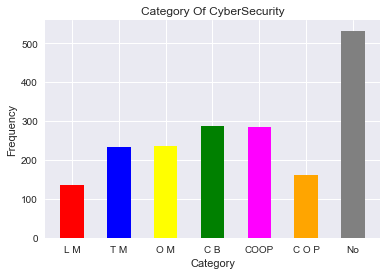

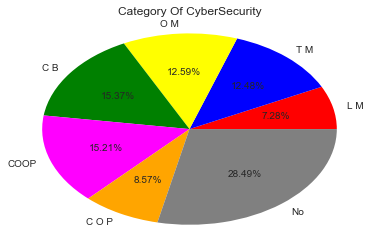

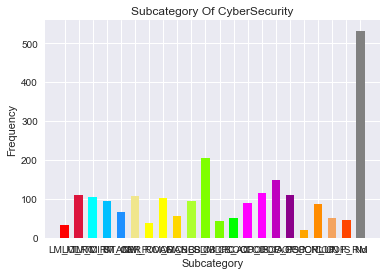

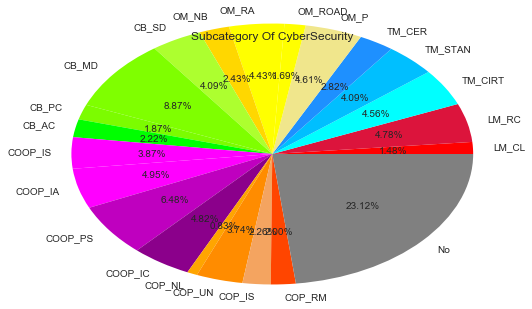

Sentence: T H E N A T I O N A L S T R A T E G Y T O SECURE CYBERSPACE F E B R U A R Y 2 0 0 3 T H E N A T I O N A L S T R A T E G Y T O SECURE CYBERSPACE F E B R U A R Y 2 0 0 3 THE WHITE HOUSE WASHINGTON My Fellow Americans: The way business is transacted, government operates, and national defense is conducted have changed.
Country:US-1
Category: []
Subcategory: []


Sentence: These activities now rely on an interdependent network of information technology infrastructures called cyberspace.
Country:US-1
Category: []
Subcategory: []


Sentence: The National Strategy to Secure Cyberspace provides a framework for protecting this infrastructure that is essential to our economy, security, and way of life.
Country:US-1
Category: []
Subcategory: []


Sentence: In the past few years, threats in cyberspace have risen dramatically.
Country:US-1
Category: [u'technical measures', u'cooperation']
Subcategory: [u'cirt', u'intra-agency cooperation', u'public sector partnership']


Sentence: The poli

In [284]:
country_visualization()